# Import software libraries

In [36]:
import sys                             # Read system parameters
import os                              # Interact with the operating system
import numpy as np                     # Work with multi-dimensional arrays and matrices
import pandas as pd                    # Manipulate and analyze data
import matplotlib                      # Create 2D charts
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp                     # Perform scientific computing and advanced mathematics
import sklearn                         # Perform data mining and analysis
import seaborn as sb                   # Perform data visualization

# Summarize software libraries used
print('Libraries used in this project:')
print('- NumPy {}'.format(np.__version__))
print('- Pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- SciPy {}'.format(sp.__version__))
print('- Scikit-learn {}'.format(sklearn.__version__))
print('- Python {}\n'.format(sys.version))

Libraries used in this project:
- NumPy 1.16.2
- Pandas 0.24.2
- Matplotlib 3.0.3
- SciPy 1.2.1
- Scikit-learn 0.20.3
- Python 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) 
[GCC 7.3.0]



# Load the dataset

In [37]:
# Load the dataset as a pandas DataFrame from ./seoul_bike_data/seoul_bike_data.csv
PROJECT_ROOT_DIR = '.'
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, 'seoul_bike_data')
print('Data files in this project:', os.listdir(DATA_PATH) )

# Read the raw dataset
data_raw_file = os.path.join( DATA_PATH, 'seoul_bike_data.csv' )
data_raw = pd.read_csv( data_raw_file )
print('Loaded {} records from {}.\n'.format(len(data_raw), data_raw_file))

Data files in this project: ['seoul_bike_data.csv']
Loaded 8394 records from ./seoul_bike_data/seoul_bike_data.csv.



# Get acquainted with the dataset

In [38]:
# View data types and see if there are missing entries.
print(data_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8394 entries, 0 to 8393
Data columns (total 9 columns):
bikes_rented    8394 non-null int64
temp            8394 non-null float64
humidity        8394 non-null int64
wind_speed      8394 non-null float64
visibility      8394 non-null int64
dew_temp        8394 non-null float64
solar_rad       8394 non-null float64
rainfall        8394 non-null float64
snowfall        8394 non-null float64
dtypes: float64(6), int64(3)
memory usage: 590.3 KB
None


# Show example records

In [39]:
# View first 10 records.
print(data_raw.head(10))

   bikes_rented  temp  humidity  wind_speed  visibility  dew_temp  solar_rad  \
0           254  -5.2        37         2.2        2000     -17.6       0.00   
1           204  -5.5        38         0.8        2000     -17.6       0.00   
2           173  -6.0        39         1.0        2000     -17.7       0.00   
3           107  -6.2        40         0.9        2000     -17.6       0.00   
4            78  -6.0        36         2.3        2000     -18.6       0.00   
5           100  -6.4        37         1.5        2000     -18.7       0.00   
6           181  -6.6        35         1.3        2000     -19.5       0.00   
7           460  -7.4        38         0.9        2000     -19.3       0.00   
8           930  -7.6        37         1.1        2000     -19.8       0.01   
9           490  -6.5        27         0.5        1928     -22.4       0.23   

   rainfall  snowfall  
0       0.0       0.0  
1       0.0       0.0  
2       0.0       0.0  
3       0.0       0.0  

# Examine a general summary of statistics

In [40]:
# View summary statistics (mean, standard deviation, min, max, etc.) for each feature.
with pd.option_context('float_format', '{:.2f}'.format): 
    print( data_raw.describe() )

       bikes_rented    temp  humidity  wind_speed  visibility  dew_temp  \
count       8394.00 8394.00   8394.00     8394.00     8394.00   8394.00   
mean         731.37   12.81     58.07        1.74     1433.23      3.96   
std          643.62   12.11     20.48        1.03      609.80     13.24   
min            2.00  -17.80      0.00        0.10       27.00    -30.60   
25%          214.00    3.10     42.00        1.00      932.25     -5.10   
50%          546.00   13.60     57.00        1.50     1690.00      4.80   
75%         1088.00   22.70     74.00        2.30     2000.00     15.20   
max         3556.00   39.40     98.00        7.40     2000.00     27.20   

       solar_rad  rainfall  snowfall  
count    8394.00   8394.00   8394.00  
mean        0.57      0.15      0.08  
std         0.87      1.13      0.45  
min         0.00      0.00      0.00  
25%         0.00      0.00      0.00  
50%         0.01      0.00      0.00  
75%         0.94      0.00      0.00  
max         

# Look for columns that correlate with `bikes_rented`

In [41]:
# View the correlation values for each feature compared to the label.
print('Pearson correlations with bikes_rented')
corr_matrix = data_raw.corr()
corr_matrix['bikes_rented'].sort_values(ascending=False)

Pearson correlations with bikes_rented


bikes_rented    1.000000
temp            0.563440
dew_temp        0.401160
solar_rad       0.272748
visibility      0.213989
wind_speed      0.120961
rainfall       -0.128794
snowfall       -0.151881
humidity       -0.201466
Name: bikes_rented, dtype: float64

# Visually analyze cross correlations

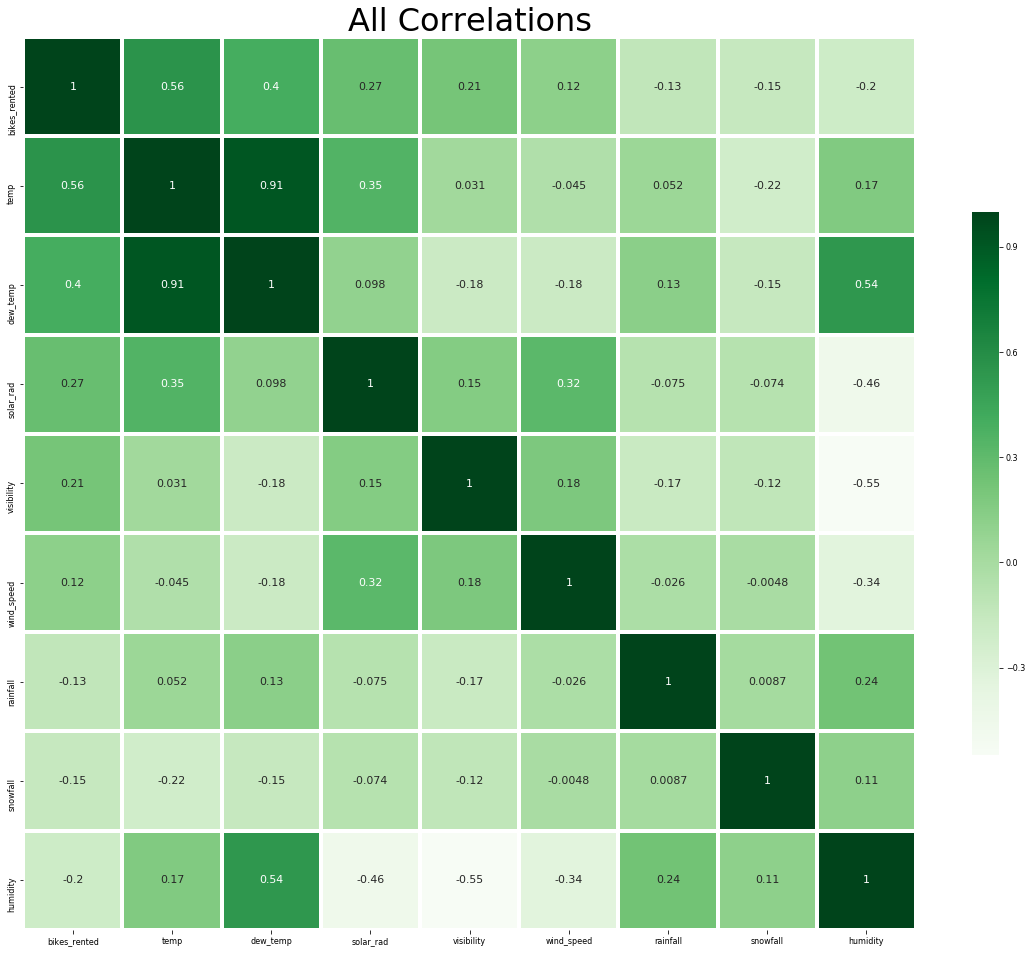

In [42]:
# Use Seaborn to plot the correlation matrix as a heatmap.
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Specify size and title for the visualization
f, axes = plt.subplots(figsize=(20, 20))
plt.title('All Correlations',fontsize=32)

# For the purpose of visualization, we'll use a different order for the features.
# We'll start with price, to make it easier to compare all other features with it.
features = ['bikes_rented','temp','dew_temp',
            'solar_rad','visibility','wind_speed','rainfall','snowfall','humidity']

# Use Seaborn library to plot the correlation matrix as a heatmap
sb.heatmap(data_raw[features].corr(),
           linewidths = 3.0,
           square = True,
           cmap = 'Greens',
           linecolor='w',
           annot=True,
           annot_kws={'size':11},
           cbar_kws={'shrink': .5});


# Use histograms to visualize the distribution of all features

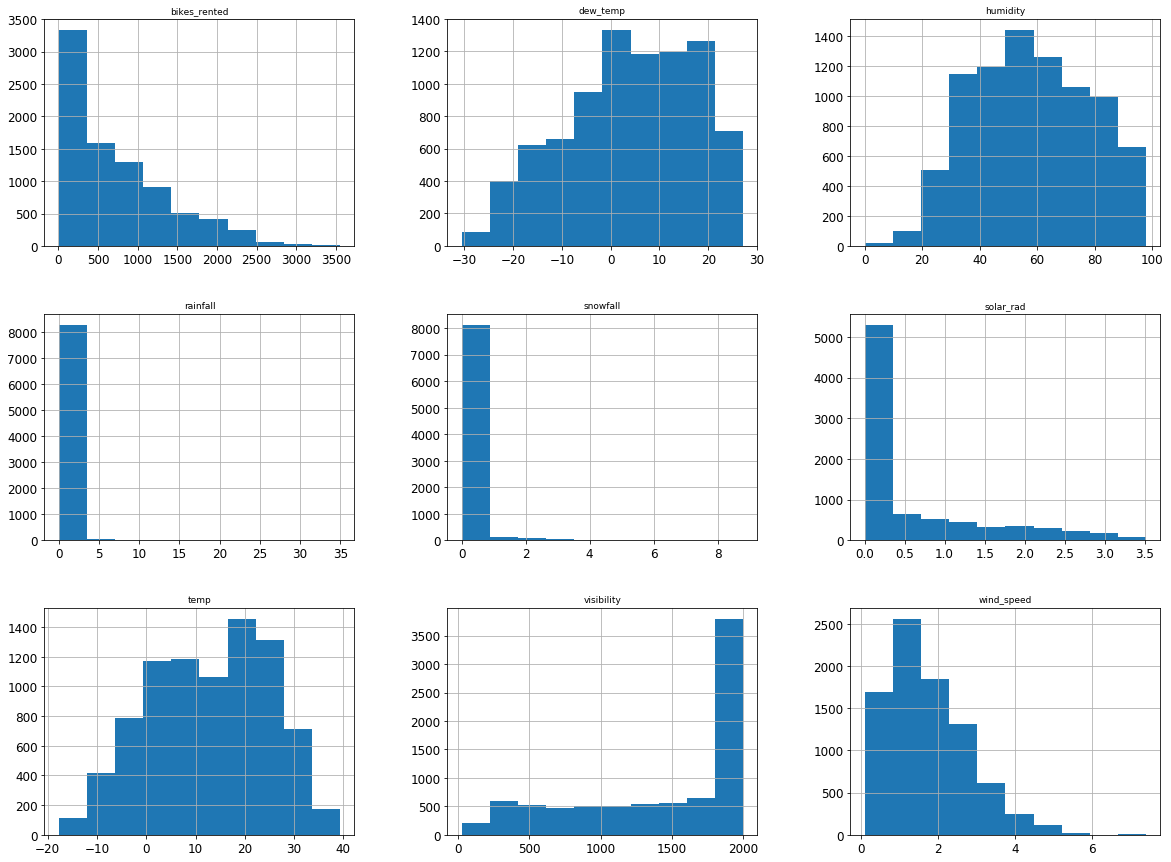

<Figure size 432x288 with 0 Axes>

In [43]:
# Use Matplotlib to plot distribution histograms for all features.
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

data_raw.hist(figsize=(20,15));
plt.figure();

# Split the data into training and testing sets and labels

In [44]:
# Split the training and test datasets and their labels.
from sklearn.model_selection import train_test_split

# Price is the dependent variable (value to be predicted), so it will be
# removed from the training data and put into a separate dataframe for labels.

label_columns = ['bikes_rented']

training_columns = ['temp','dew_temp',
            'solar_rad','visibility','wind_speed','rainfall','snowfall','humidity']

# Split independent and dependent variables.
data_train,data_test,data_train_labels,data_test_labels = train_test_split(data_raw[training_columns], 
                                                                           data_raw[label_columns], 
                                                                           random_state = 42)

# Compare the number of rows and columns in the original data to the training and testing sets
print(f'Original Set:      {data_raw.shape}')
print('------------------------------')
print(f'Training Features: {data_train.shape}')
print(f'Testing Features:  {data_test.shape}')
print(f'Training Labels:   {data_train_labels.shape}')
print(f'Testing Labels:    {data_test_labels.shape}')

Original Set:      (8394, 9)
------------------------------
Training Features: (6295, 8)
Testing Features:  (2099, 8)
Training Labels:   (6295, 1)
Testing Labels:    (2099, 1)


# Build and test an initial linear regression model

In [45]:
# Create a linear regression model.
from sklearn.linear_model import LinearRegression
from time import time

# Create a linear regression model
regressor = LinearRegression()

# Fit the model using training data and labels
start = time()
regressor.fit(data_train, data_train_labels);
end=time()
train_time = (end - start) * 1000
print('Model took {:,.2f} milliseconds to fit.'.format(train_time))

Model took 2.43 milliseconds to fit.


# Use the holdout dataset to test the model

In [46]:
# Print the regressor model's score using the test data and labels.
score = regressor.score(data_test, data_test_labels)
'Score: {}%'.format(int(round(score * 100)))

'Score: 44%'

# Compare the first ten predictions to actual values

In [47]:
# Make predictions on the test set.
predicted_prices = regressor.predict(data_test)
predictions = data_test_labels.copy()
predictions['predicted'] = predicted_prices

# View examples comparing actual prices to predicted prices
with pd.option_context('float_format', '{:,.2f}'.format): print( predictions.head(10) )

      bikes_rented  predicted
33             328      80.39
3898          1058   1,157.49
766            273     517.14
8071          1037     815.20
4746          2378   1,076.47
5422           695     839.23
1426           170     121.40
1328           322     -60.25
1076           321     443.22
5209           670     837.60


# Identify outliers

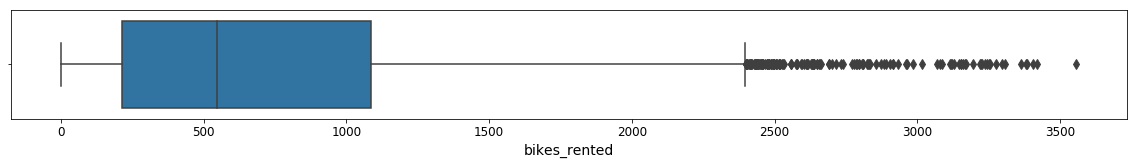

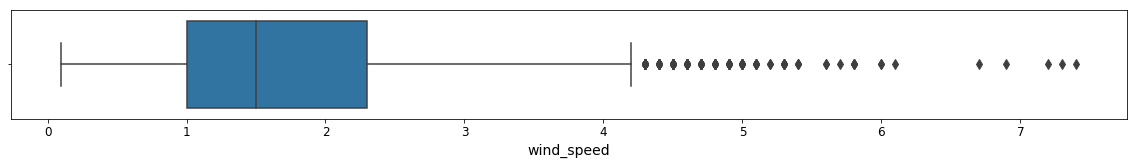

In [48]:
# Use Matplotlib to create box plot distributions for bikes rented and wind speed.
feature_list = ['bikes_rented','wind_speed']

for feature in feature_list:
    plt.figure(figsize=(20,2))
    bplot = sb.boxplot(x=feature, data=data_raw, orient="h", fliersize=7)

# Examine data values in the outliers

In [49]:
# Show rows that exceed 3,500 bikes rented.
data_train.loc[data_train_labels['bikes_rented'] > 3500]

,temp,dew_temp,solar_rad,visibility,wind_speed,rainfall,snowfall,humidity
4743,24.1,15.0,0.56,1301,2.9,0.0,0.0,57


In [50]:
# Show rows with wind speed greater than 6 meters per second.
data_train.loc[data_train['wind_speed'] > 6]

,temp,dew_temp,solar_rad,visibility,wind_speed,rainfall,snowfall,humidity
909,0.7,-2.8,0.0,692,6.7,0.9,1.0,77
3112,19.7,9.5,0.2,2000,7.2,0.0,0.0,52
3115,17.5,11.9,0.0,1634,7.3,0.5,0.0,70
6230,25.3,19.4,0.0,925,6.9,0.4,0.0,70
3108,21.2,5.1,1.8,1992,7.4,0.0,0.0,35


# Drop outliers from the training dataset

In [51]:
print(f'{len(data_train):6d} Bikes_rented in the training dataset')
# Keep only the rows where number of bikes rented is less than 3,500.
data_train = data_train.loc[data_train_labels['bikes_rented'] <= 3500]
data_train_labels = data_train_labels.loc[data_train_labels['bikes_rented'] <= 3500]
print(f'{len(data_train):6d} bikes rented remain after dropping bikes rented over 3,500')

# Keep only the rows where the wind speed is less than 6 m/s.
data_train_labels = data_train_labels.loc[data_train['wind_speed'] <= 6]
data_train = data_train.loc[data_train['wind_speed'] <= 6]
print(f'{len(data_train):6d} bikes rented remain after dropping wind speed over 6 m/s')

  6295 Bikes_rented in the training dataset
  6294 bikes rented remain after dropping bikes rented over 3,500
  6289 bikes rented remain after dropping wind speed over 6 m/s


# Compare the scale and distribution of `bikes_rented` and `wind_speed`

Maximum bikes_rented = 3418
Maximum wind_speed = 6.0


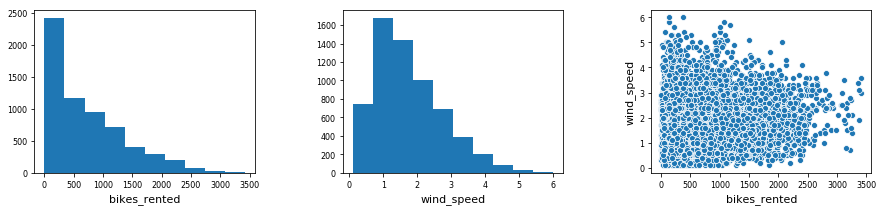

In [52]:
# Define a function that uses Matplotlib to visually compare the scale and distribution of bikes rented and wind speed.
def compare_price_sqft():

    print('Maximum bikes_rented =', data_train_labels.loc[data_train_labels['bikes_rented'].idxmax()]['bikes_rented']);
    print('Maximum wind_speed =', data_train.loc[data_train['wind_speed'].idxmax()]['wind_speed']);

    fig = plt.figure(figsize=(15,3))
    fig.subplots_adjust(wspace=.4)

    plt.rc('axes', titlesize=9)     # fontsize of the axes title
    plt.rc('axes', labelsize=11)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=8)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=8)    # fontsize of the tick labels

    ax1=fig.add_subplot(1, 3, 1)
    plt.xlabel('bikes_rented')
    plt.hist(data_train_labels['bikes_rented'], label='bikes_rented');

    ax2=fig.add_subplot(1, 3, 2)
    plt.xlabel('wind_speed')
    plt.hist(data_train['wind_speed'], label='wind_speed');

    # View relationship between price and sqft_living
    ax2=fig.add_subplot(1, 3, 3)
    sb.scatterplot(x=data_train_labels['bikes_rented'], y=data_train['wind_speed']);
    
    
compare_price_sqft()

# Transform `bikes_rented` and `wind_speed`, and compare results

Maximum bikes_rented = 8.136810863675537
Maximum wind_speed = 1.791759469228055


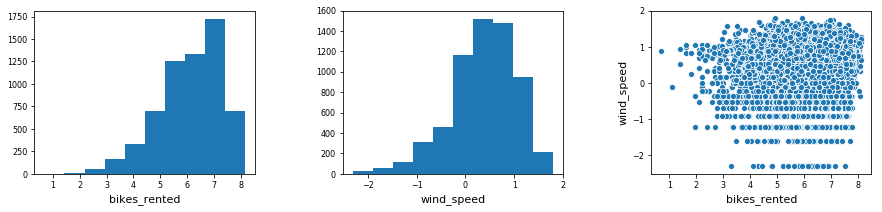

In [53]:
# Apply a log transformation (np.log) to scale bikes rented and wind speed.
data_train['wind_speed'] = np.log(data_train['wind_speed'])
data_train_labels['bikes_rented'] = np.log(data_train_labels['bikes_rented'])

# Log transformation must be applied to test dataset as well
data_test['wind_speed'] = np.log(data_test['wind_speed'])
data_test_labels['bikes_rented'] = np.log(data_test_labels['bikes_rented'])

# Compare scale and distribution of price and sqft_living
compare_price_sqft()

# Compare scale and distribution of bikes rented and wind speed by calling the function you defined earlier.

# Build and test a new linear regression model

In [54]:
# Create a linear regression model and fit it using the transformed training data.
from sklearn.linear_model import LinearRegression

# Create a linear regression model and fit it using the training data
regressor = LinearRegression()

start = time()
regressor.fit(data_train, data_train_labels);
end=time()
train_time = (end - start) * 1000
print('Model took {:,.2f} milliseconds to fit.'.format(train_time))

# Evaluate the model's performance
score = regressor.score(data_test, data_test_labels)
'Score: {}%'.format(int(round(score * 100)))

Model took 2.63 milliseconds to fit.


'Score: 53%'

# Compare the first ten predictions to actual values for the new model

In [55]:
# Make predictions on the test set.
# y_pred is the predicted prices that will be produced by testing
predicted_prices = regressor.predict(data_test)
predictions = data_test_labels.copy()
predictions['predicted'] = predicted_prices

# View examples of the transformed prices
with pd.option_context('float_format', '{:,.2f}'.format): print( predictions.head(10) )

      bikes_rented  predicted
33            5.79       4.99
3898          6.96       7.16
766           5.61       5.70
8071          6.94       6.43
4746          7.77       6.63
5422          6.54       6.13
1426          5.14       5.19
1328          5.77       4.72
1076          5.77       5.62
5209          6.51       6.28


# Convert the bike rentals back to their initial scale

In [56]:
# Call math.exp to convert bikes rented back to their initial scale.
import math
predictions = predictions.applymap(math.exp)

# View examples of the actual and predicted prices
with pd.option_context('float_format', '{:,.2f}'.format): print( predictions.head(10) )


      bikes_rented  predicted
33          328.00     147.57
3898      1,058.00   1,293.24
766         273.00     298.08
8071      1,037.00     617.74
4746      2,378.00     757.99
5422        695.00     459.41
1426        170.00     179.43
1328        322.00     112.54
1076        321.00     276.72
5209        670.00     534.71
